In [37]:
from matplotlib import pyplot as plt
import re
import pprint

[10.78, 5.316, 4.289, 3.911, 3.738, 3.611, 3.525, 3.45, 3.363, 3.304, 3.232, 3.178, 3.126, 3.064, 3.026, 2.97, 2.933, 2.9, 2.848, 2.818, 2.789, 2.753, 2.727, 2.699, 2.657, 2.63, 2.594, 2.567, 2.55, 2.53, 2.51, 2.496, 2.471, 2.427, 2.404, 2.383, 2.352, 2.334, 2.314, 2.284, 2.27, 2.233, 2.224, 2.2, 2.166, 2.151, 2.13, 2.11, 2.088, 2.069, 2.051, 2.024, 2.017, 2.012, 1.989, 1.981, 1.951, 1.936, 1.917, 1.901, 1.884, 1.867, 1.85, 1.848, 1.841, 1.825, 1.81, 1.8, 1.793, 1.785, 1.777, 1.758, 1.748, 1.742, 1.73, 1.73, 1.724, 1.707, 1.703, 1.7, 1.696, 1.69, 1.689, 1.678, 1.679, 1.666, 1.661, 1.66, 1.652, 1.648, 1.646, 1.638, 1.636, 1.63, 1.628, 1.622, 1.614, 1.621, 1.613, 1.611]


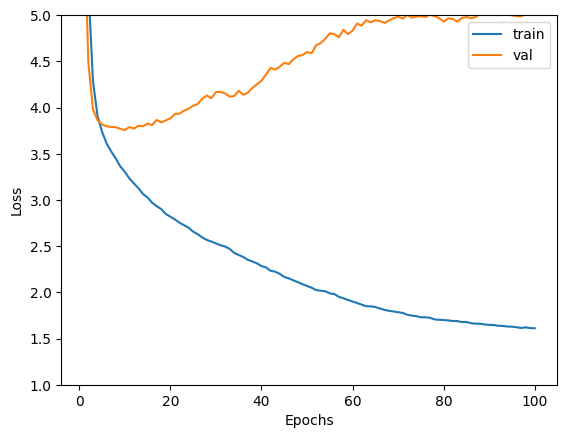

In [67]:
logpath = "/home/k-yanase/OFA/run_scripts/hoi/hoi_logs/A100-80GBx4-02/100_1000_5e-5_512_hoi36_rank0.log"
logpath = "/home/k-yanase/OFA/run_scripts/hoi/hoi_logs/A100-80GBx4-02/k-yanase_100_1000_5e-5_512_hoi48_rank0.log"
logpath = "/home/k-yanase/OFA/run_scripts/hoi/hoi_logs/A100-80GBx4-02/k-yanase_100_1000_5e-5_512_hoi48_rank0_hoilimit30.log"

with open(logpath) as f:
    results = f.read()
index = 0
train_loss = []
val_loss = []
for result in results.split("\n"):
    if re.match("^.*progress_bar.py.*\| loss [0-9]+.?[0-9]* \|",result):
        if re.match("^.*progress_bar.py.*\| valid on \'valid\' subset",result):
            val_loss.append(float(re.search("\| loss [0-9]+.?[0-9]*",result).group().replace("| loss ","")))
        else:
            train_loss.append(float(re.search("\| loss [0-9]+.?[0-9]*",result).group().replace("| loss ","")))

print(train_loss)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(1,5)
plt.plot(range(1,len(train_loss)+1),train_loss)
plt.plot(range(1,len(train_loss)+1),val_loss)
plt.legend(['train','val'])
plt.show()